In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../MachineLearning/datasets/Water Quality Testing.csv')

In [3]:
df.head()


,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [5]:
df.isna().sum()

Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

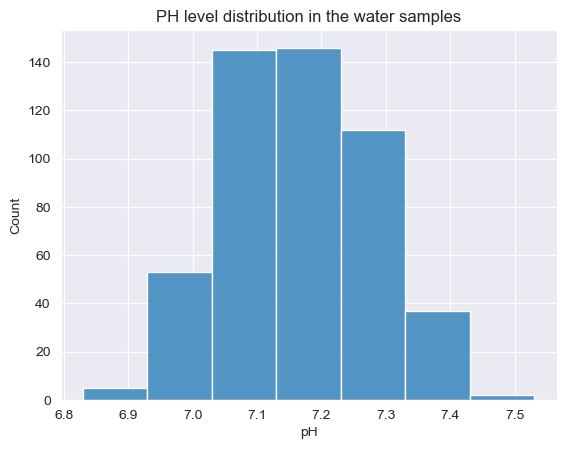

In [6]:
sns.set_style('darkgrid')
sns.histplot(data=df,x='pH',binwidth=0.1)
plt.title('PH level distribution in the water samples')
plt.show()

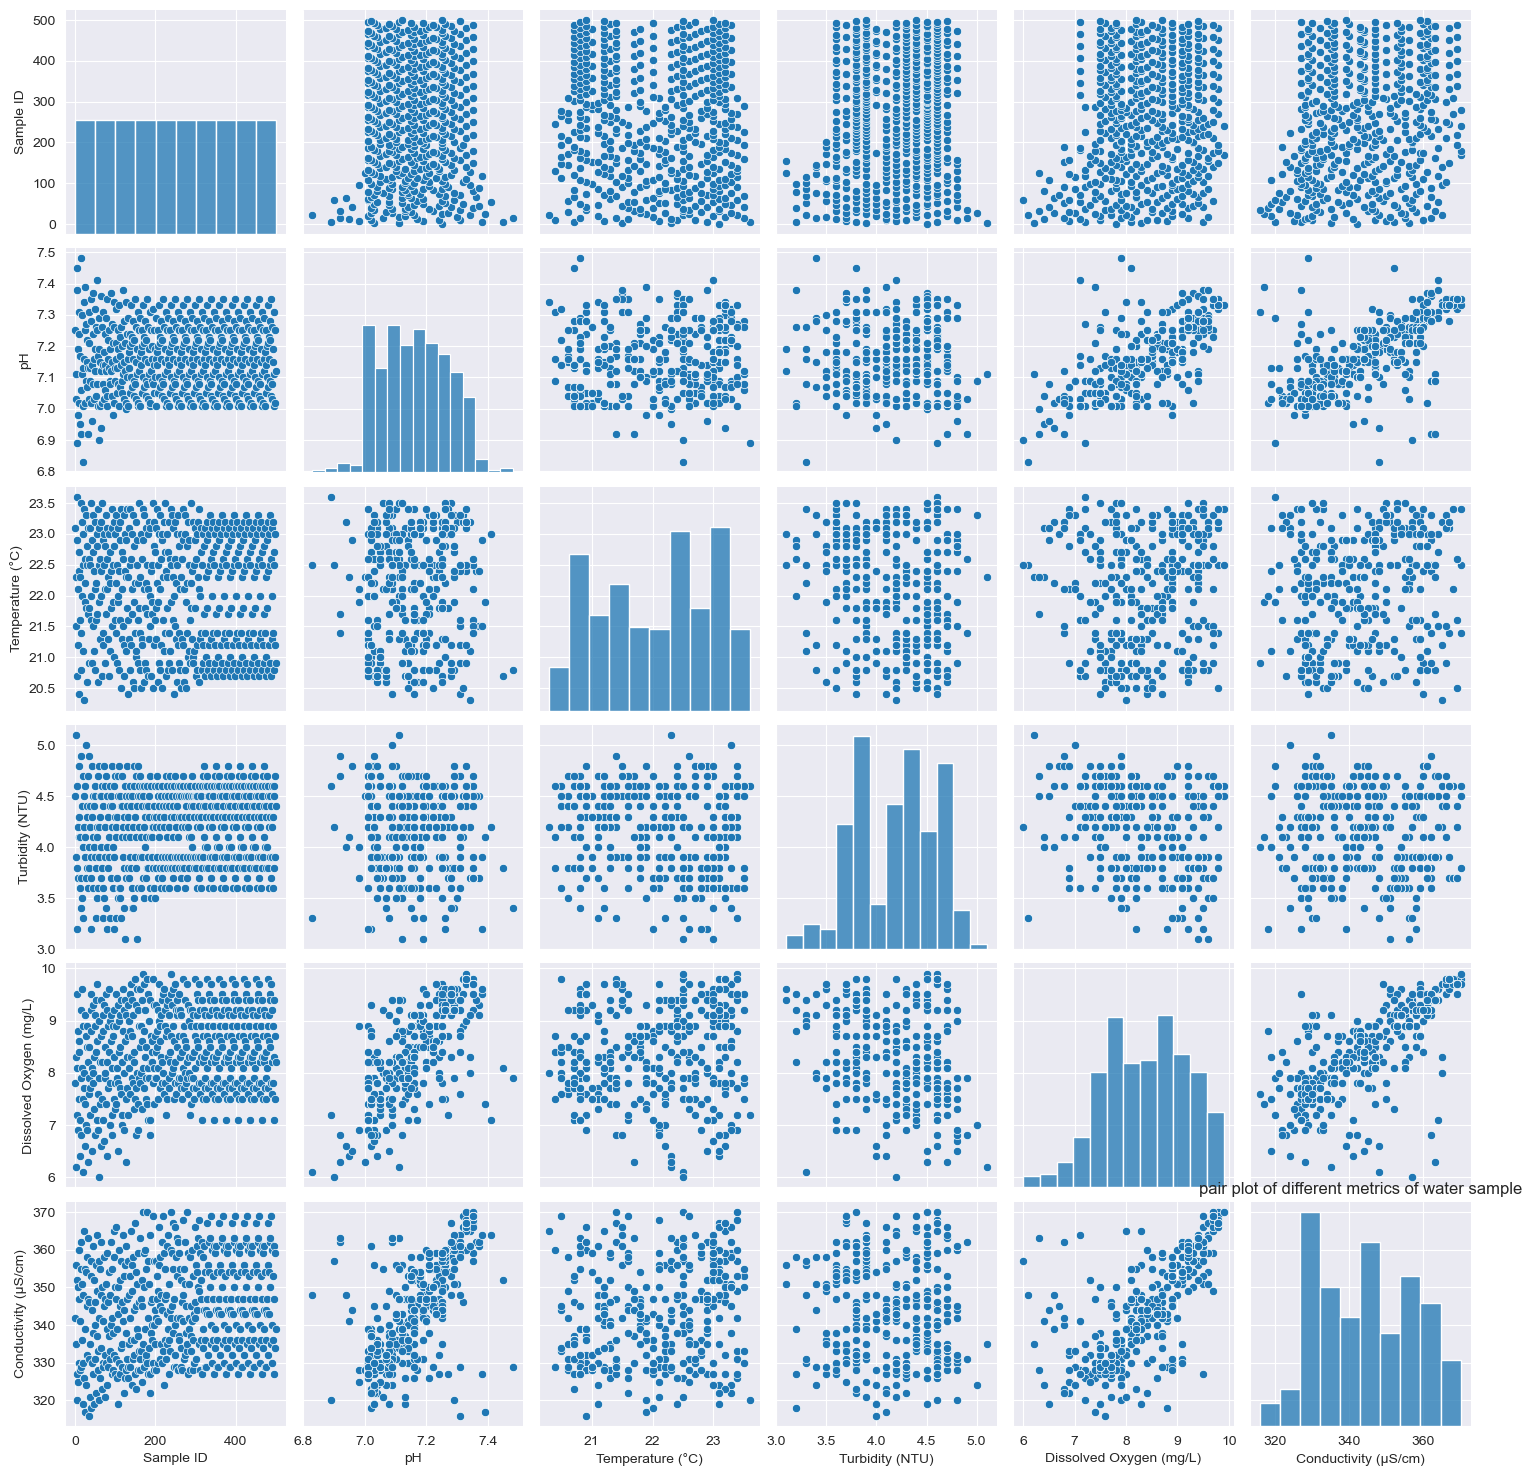

In [7]:
sns.pairplot(df)
plt.title('pair plot of different metrics of water sample')
plt.show()

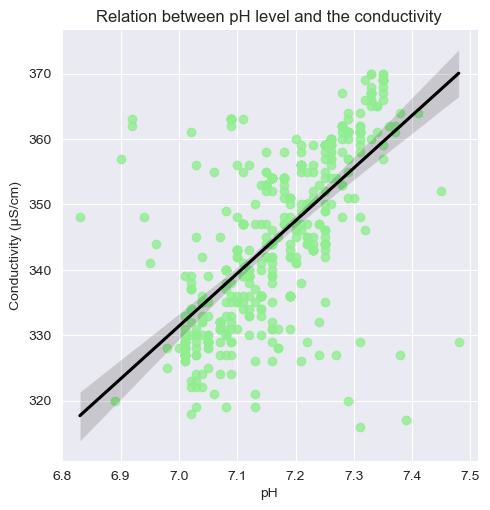

In [9]:
sns.lmplot(data=df,x='pH',y='Conductivity (µS/cm)',scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between pH level and the conductivity")
plt.show()

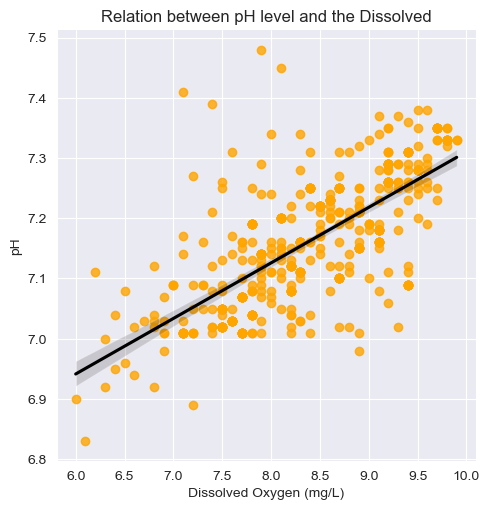

In [10]:
sns.lmplot(data=df,x='Dissolved Oxygen (mg/L)',y='pH',scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between pH level and the Dissolved")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler(copy=True,with_mean=True,with_std=True)
scalar.fit(df)
sampled_scaler = scalar.transform(df)

In [21]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=42)
cluster=model.fit_predict(sampled_scaler)

In [22]:
cluster

array([1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

In [23]:
level = pd.Series(cluster)

In [24]:
level

0      1
1      1
2      1
3      2
4      2
      ..
495    0
496    2
497    0
498    2
499    0
Length: 500, dtype: int32

d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


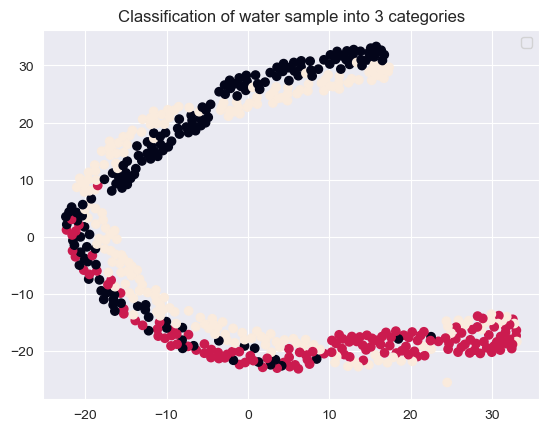

In [18]:
from sklearn.manifold import TSNE
model=TSNE()
transformed_model = model.fit_transform(df)

X=transformed_model[:,0]
Y=transformed_model[:,1]

plt.scatter(X,Y,c=level)
plt.title("Classification of water sample into 3 categories")
plt.legend()
plt.show()


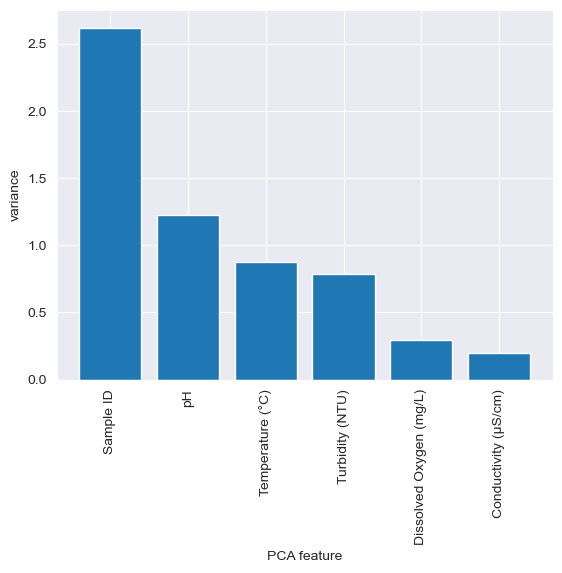

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA()

pipline=make_pipeline(scalar,pca)

pipline.fit(df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features,df.columns)
plt.xticks(rotation=90)
plt.show()

In [26]:
df['classification'] = cluster
df.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
0,1,7.25,23.1,4.5,7.8,342,1
1,2,7.11,22.3,5.1,6.2,335,1
2,3,7.03,21.5,3.9,8.3,356,1
3,4,7.38,22.9,3.2,9.5,327,2
4,5,7.45,20.7,3.8,8.1,352,2


In [27]:
df['classification'] = df['classification'].fillna(0)
df['classification'] = df['classification'].astype("int")
df['classification'] = df['classification'].map({0:'category1',1:'category2',2:'category3'})
df['classification'].value_counts()

category3    205
category1    155
category2    140
Name: classification, dtype: int64

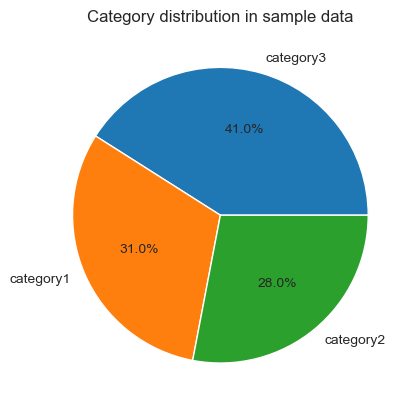

In [28]:
category = df['classification'].value_counts().reset_index(name='counts')
plt.pie(x=category['counts'],labels=category['index'],autopct='%1.1f%%')
plt.title("Category distribution in sample data")
plt.show()

<Figure size 1500x800 with 0 Axes>

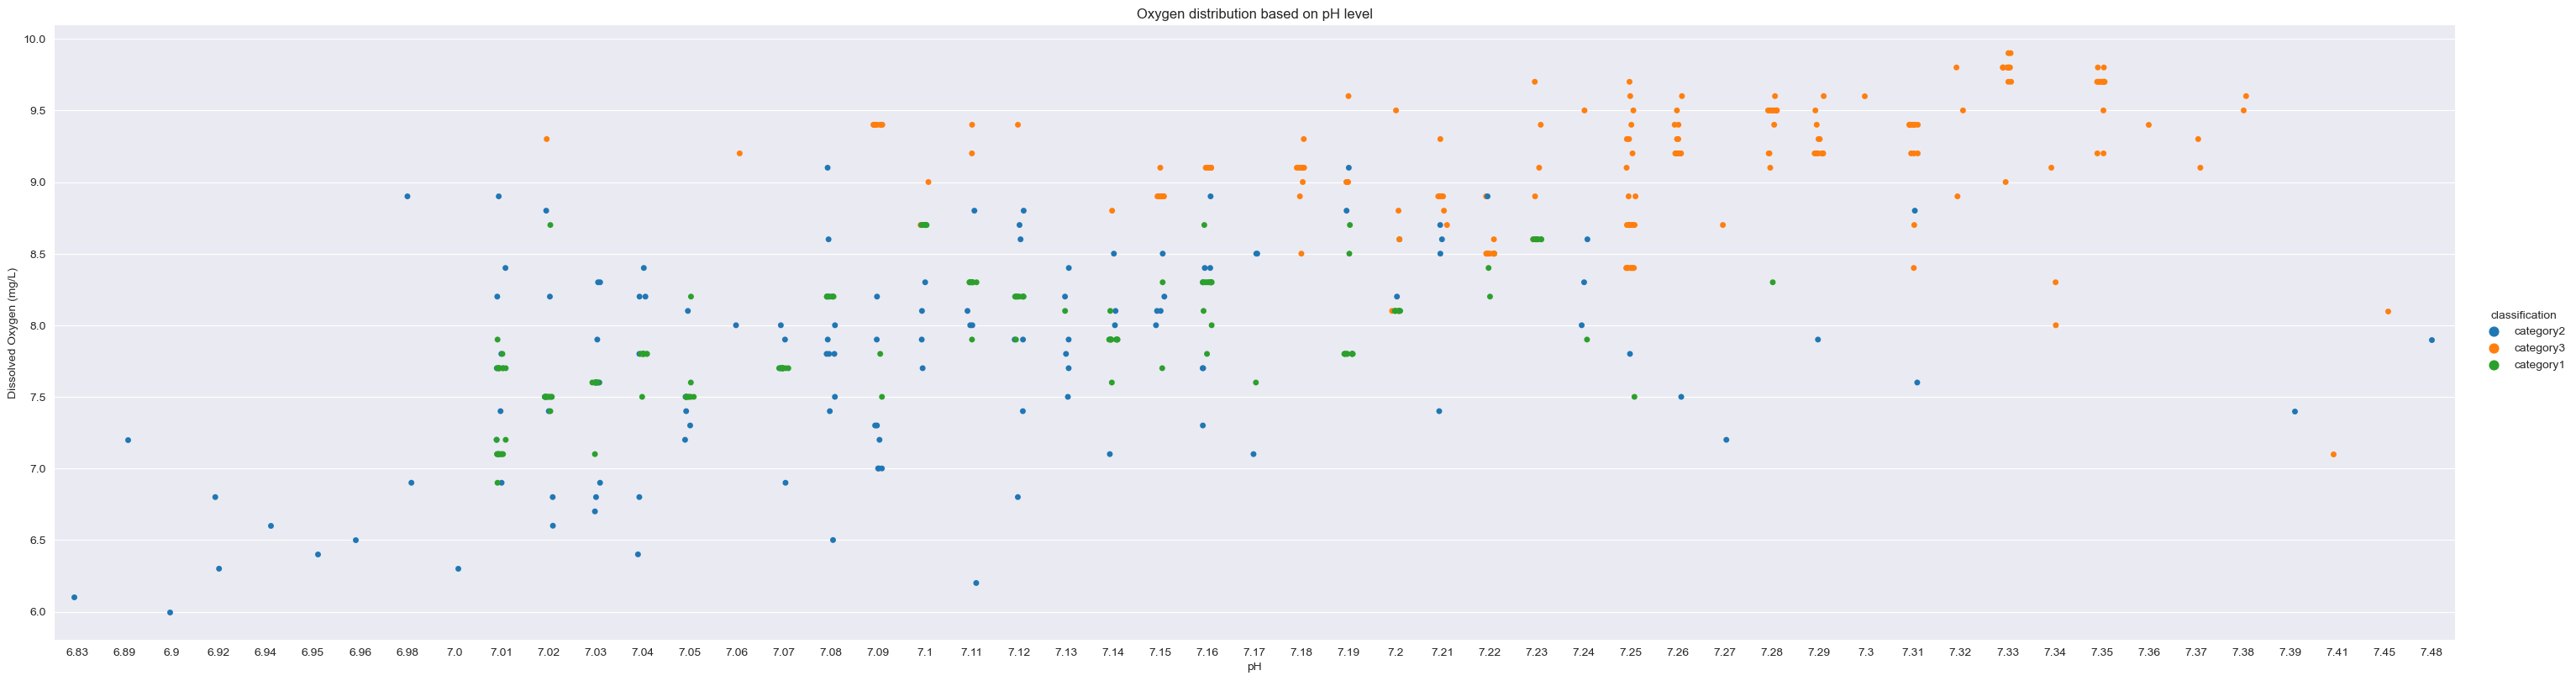

In [29]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,x="pH",y="Dissolved Oxygen (mg/L)",hue="classification",height=8,aspect=3.7)
plt.title("Oxygen distribution based on pH level")
plt.show()

<Figure size 1500x800 with 0 Axes>

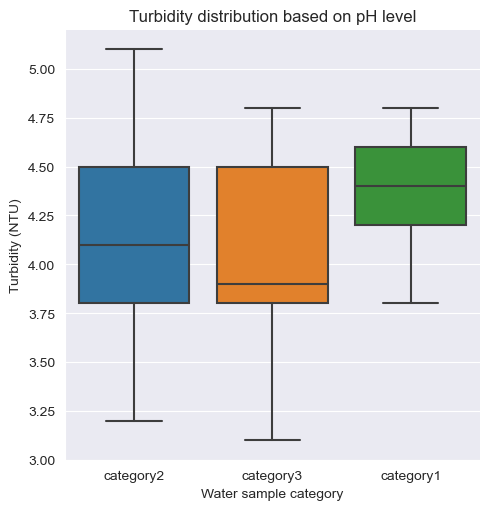

In [30]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,y="Turbidity (NTU)",x="classification",kind='box')
plt.title("Turbidity distribution based on pH level")
plt.xlabel("Water sample category")
plt.show()

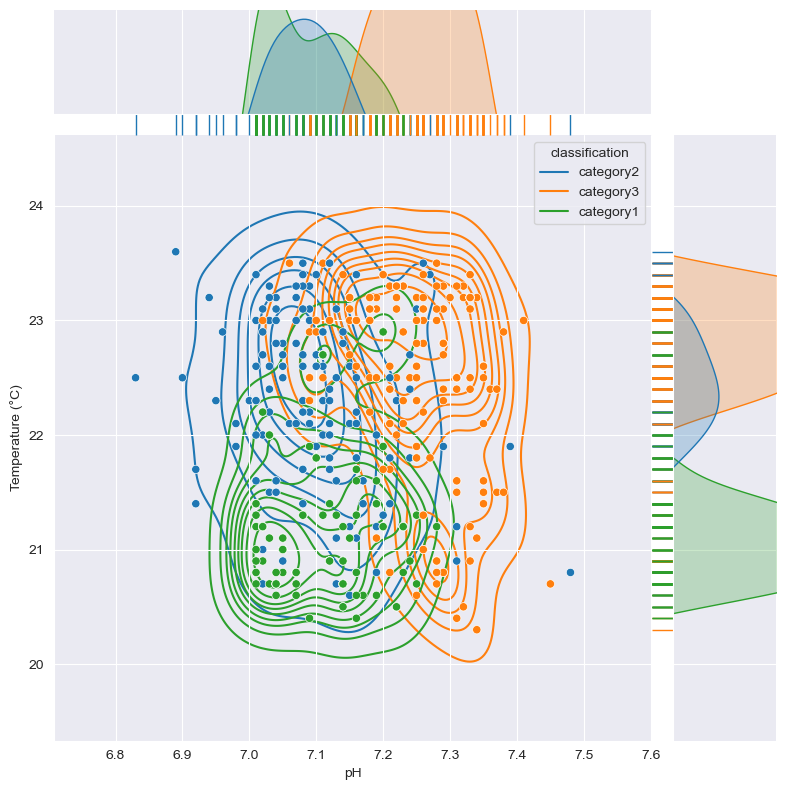

In [31]:
g = sns.jointplot(data=df,x="pH",y="Temperature (°C)",hue="classification",height=8)
g.plot_joint(sns.kdeplot,color='y',zorder=0)
g.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)
plt.show()

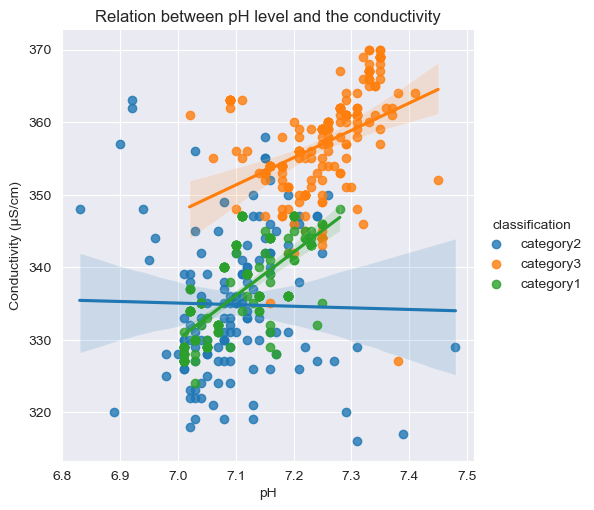

In [32]:
sns.lmplot(data=df,x="pH",y="Conductivity (µS/cm)",hue='classification')
plt.title("Relation between pH level and the conductivity")
plt.show()

In [33]:
df.groupby("classification")['Dissolved Oxygen (mg/L)'].mean()

classification
category1    7.939355
category2    7.760714
category3    9.141463
Name: Dissolved Oxygen (mg/L), dtype: float64

In [34]:
df.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
0,1,7.25,23.1,4.5,7.8,342,category2
1,2,7.11,22.3,5.1,6.2,335,category2
2,3,7.03,21.5,3.9,8.3,356,category2
3,4,7.38,22.9,3.2,9.5,327,category3
4,5,7.45,20.7,3.8,8.1,352,category3
